#### Raquel Senior 

# Homework 3 

1)  Visualize the categories of your target variable and describe the dataset generally (the data includes news articles from the BBC news.)  A simple description is fine.

2) Preprocess your data such that each document in the data is represented as a sequence of equal length.

3)  Use the data to fit separate models to each of the following architectures:

A. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)

B. A model using an Embedding layer with Conv1d Layers

C. A model using an Embedding layer with one sequential layer (LSTM or GRU)

D. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)

E. A model using an Embedding layer with bidirectional sequential layers

F. Now retrain your best model from C, D, and E using dropout (you may need to increase epochs!).

4) Discuss 1) which model(s) performed best and speculate about 2) how you might try to further improve the predictive power of your model (e.g. Glove embeddings? More layers? Combining Conv1D with LSTM layers? More LSTM hidden nodes?)

 

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
df['category_id'] = df['category'].factorize()[0]
df.groupby('category').category_id.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category_id, dtype: int64

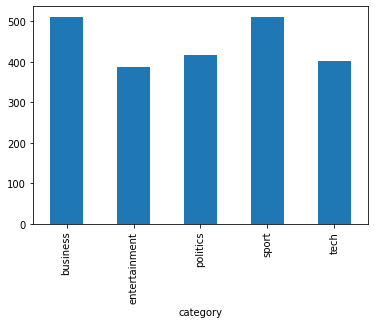

In [7]:
# Visualize 

df.groupby('category').category_id.count().plot.bar(ylim=0)


This dataset includes BBC news articles about tech, business, sport, entertainment and politics. Most articles are about sports followed by business, politics, tech, and entertainment in that order. 

In [0]:
# Preprocess data 
from sklearn.preprocessing import OneHotEncoder

texts = df['text']

categories = df['category']

ohe = OneHotEncoder()

y = ohe.fit_transform(np.asarray(categories).reshape(-1,1))


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 100

max_words = 10000

train_len = 1500

val_len = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
tok_text = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

data = pad_sequences(tok_text, maxlen=max_len)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = y[indices]

X_train = data[:train_len]
y_train = labels[:train_len]

X_val = data[train_len: train_len + val_len]
y_val = labels[train_len: train_len + val_len]

X_test = data[train_len + val_len:]
y_test = labels[train_len + val_len:]

Using TensorFlow backend.


In [0]:
from keras.layers import Embedding, Flatten, Dense
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop



In [26]:
# A
model = Sequential()
model.add(Embedding(max_words,250,input_length=max_len))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(5, activation= 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5773 - acc: 0.2947 - val_loss: 1.5125 - val_acc: 0.4300
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9023 - acc: 0.9653 - val_loss: 1.2644 - val_acc: 0.5560
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2559 - acc: 1.0000 - val_loss: 1.0185 - val_acc: 0.6380
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0371 - acc: 1.0000 - val_loss: 0.8588 - val_acc: 0.6800
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.7829 - val_acc: 0.7160
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.7705 - val_acc: 0.7320
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 6.4224e-04 - acc: 1.0000 - val_loss: 0.7622 - val_acc: 0.7360
Epoch 8/10


In [27]:
# B Cov1d

model = Sequential()
model.add(layers.Embedding(max_words, 250, input_length=max_len)) 
model.add(layers.Conv1D(128, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(128, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)

1500/1500 [==============================] - 5s 4ms/step - loss: 4.1694 - acc: 0.1893 - val_loss: 3.7471 - val_acc: 0.1620
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 4.0810 - acc: 0.1893 - val_loss: 3.6774 - val_acc: 0.1620
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 4.0127 - acc: 0.1893 - val_loss: 3.6153 - val_acc: 0.1620
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 3.9465 - acc: 0.1893 - val_loss: 3.5516 - val_acc: 0.1620
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 3.8744 - acc: 0.1893 - val_loss: 3.4779 - val_acc: 0.1620
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 3.7844 - acc: 0.1893 - val_loss: 3.3802 - val_acc: 0.1620
Epoch 8/10
1500/1500 [==============================] - 5s 4ms/step - loss: 3.6555 - acc: 0.1893 - val_loss: 3.2250 - val_acc: 0.1620
Epoch 9/10
1500/1500 [==============================] - 5s 4ms/step - los

In [34]:
# C One sequential 
model = Sequential()
model.add(Embedding(max_words, 250, input_length=max_len))
model.add(LSTM(250))
model.add(Dense(250, activation='relu'))
model.add(Dense(5, activation= 'softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/20
1500/1500 [==============================] - 14s 9ms/step - loss: 1.6047 - acc: 0.2487 - val_loss: 1.5913 - val_acc: 0.3340
Epoch 2/20
1500/1500 [==============================] - 13s 9ms/step - loss: 1.5433 - acc: 0.3667 - val_loss: 1.4401 - val_acc: 0.2760
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 1.2742 - acc: 0.4327 - val_loss: 1.1288 - val_acc: 0.5400
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.9450 - acc: 0.5947 - val_loss: 0.9928 - val_acc: 0.7240
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6903 - acc: 0.7640 - val_loss: 1.0697 - val_acc: 0.6420
Epoch 6/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.7996 - acc: 0.7567 - val_loss: 0.8132 - val_acc: 0.6960
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4675 - acc: 0.9027 - val_loss: 0.6889 - val_acc: 0.7760
Epoch 8/

In [35]:
# GRU-one sequential
from keras.layers import GRU, Bidirectional

model = Sequential()
model.add(Embedding(max_words, 250, input_length=max_len))
model.add(GRU(250))
model.add(Dense(250, activation='relu'))
model.add(Dense(5, activation= 'softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/20
1500/1500 [==============================] - 13s 8ms/step - loss: 1.6063 - acc: 0.2540 - val_loss: 1.6002 - val_acc: 0.2780
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 1.5749 - acc: 0.3913 - val_loss: 1.5760 - val_acc: 0.3400
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 1.4812 - acc: 0.4740 - val_loss: 1.4862 - val_acc: 0.4440
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 1.1460 - acc: 0.6727 - val_loss: 1.3833 - val_acc: 0.5380
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7675 - acc: 0.7427 - val_loss: 0.9768 - val_acc: 0.6220
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4053 - acc: 0.9227 - val_loss: 0.9064 - val_acc: 0.7160
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1995 - acc: 0.9633 - val_loss: 0.8753 - val_acc: 0.7380
Epoch 8/

The LSTM model with a one sequential layer has a higher accuracy score than its GRU counterpart. 

In [36]:
# D Stacked 

model = Sequential()
model.add(Embedding(max_words, 250,input_length=max_len))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 16s 11ms/step - loss: 1.6034 - acc: 0.2233 - val_loss: 1.5852 - val_acc: 0.2280
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.4750 - acc: 0.3900 - val_loss: 1.2575 - val_acc: 0.4800
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.0786 - acc: 0.5680 - val_loss: 1.0558 - val_acc: 0.6180
Epoch 4/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.8870 - acc: 0.7147 - val_loss: 0.9103 - val_acc: 0.7020
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6647 - acc: 0.8320 - val_loss: 0.7583 - val_acc: 0.7580
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4549 - acc: 0.9240 - val_loss: 0.7688 - val_acc: 0.7560
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3111 - acc: 0.9633 - val_loss: 0.6873 - val_acc: 0.7940
Epoch 8

In [37]:
# Stacked GRU
model = Sequential()
model.add(Embedding(max_words, 250,input_length=max_len))
model.add(GRU(128,return_sequences=True))
model.add(GRU(128,return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 1.6039 - acc: 0.2267 - val_loss: 1.5902 - val_acc: 0.2580
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.5394 - acc: 0.3720 - val_loss: 1.4873 - val_acc: 0.4080
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.2437 - acc: 0.5147 - val_loss: 1.2660 - val_acc: 0.4140
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8963 - acc: 0.6460 - val_loss: 1.0718 - val_acc: 0.5860
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5718 - acc: 0.8207 - val_loss: 0.9888 - val_acc: 0.6300
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3884 - acc: 0.8880 - val_loss: 0.9026 - val_acc: 0.6900
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2607 - acc: 0.9487 - val_loss: 0.9229 - val_acc: 0.6940
Epoch 8/

The stacked GRU model has a higher accuracy score than its LSTM counterpart.

In [32]:
# E Bidirectional 
model = Sequential()
model.add(layers.Embedding(max_words, 250))
model.add(layers.Bidirectional(layers.LSTM(250)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/20
1500/1500 [==============================] - 26s 17ms/step - loss: 1.6025 - acc: 0.2680 - val_loss: 1.5869 - val_acc: 0.3640
Epoch 2/20
1500/1500 [==============================] - 25s 17ms/step - loss: 1.4679 - acc: 0.4273 - val_loss: 1.2247 - val_acc: 0.5120
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 1.1360 - acc: 0.5787 - val_loss: 1.0706 - val_acc: 0.6560
Epoch 4/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.8821 - acc: 0.6893 - val_loss: 0.8576 - val_acc: 0.6360
Epoch 5/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5817 - acc: 0.7627 - val_loss: 0.7617 - val_acc: 0.7420
Epoch 6/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.4295 - acc: 0.8593 - val_loss: 0.7604 - val_acc: 0.7360
Epoch 7/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2793 - acc: 0.8933 - val_loss: 0.6221 - val_acc: 0.7780
E

In [33]:
# Bidirectional GRU  

model = Sequential()
model.add(layers.Embedding(max_words, 250))
model.add(layers.Bidirectional(layers.GRU(250)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/20
1500/1500 [==============================] - 25s 17ms/step - loss: 1.6037 - acc: 0.2520 - val_loss: 1.5878 - val_acc: 0.2920
Epoch 2/20
1500/1500 [==============================] - 24s 16ms/step - loss: 1.5474 - acc: 0.3980 - val_loss: 1.5524 - val_acc: 0.3480
Epoch 3/20
1500/1500 [==============================] - 24s 16ms/step - loss: 1.4275 - acc: 0.4900 - val_loss: 1.4177 - val_acc: 0.4600
Epoch 4/20
1500/1500 [==============================] - 24s 16ms/step - loss: 1.1055 - acc: 0.7633 - val_loss: 1.2894 - val_acc: 0.5820
Epoch 5/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.8976 - acc: 0.8573 - val_loss: 1.0681 - val_acc: 0.6100
Epoch 6/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.5652 - acc: 0.8933 - val_loss: 0.7468 - val_acc: 0.7960
Epoch 7/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2529 - acc: 0.9513 - val_loss: 0.5143 - val_acc: 0.8260
E

The GRU bidirectional model has a higher accuracy score than its LSTM counterpart. Also, it was the model with the best performance. Its accuracy was improved by using dropout, randomly setting a fraction rate of input units to a value of 0. 

In [45]:
#F
model = Sequential()
model.add(Embedding(max_words, 250, input_length=max_len))
model.add(LSTM(250,dropout=0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(5, activation= 'softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/20
1500/1500 [==============================] - 14s 9ms/step - loss: 1.6077 - acc: 0.2173 - val_loss: 1.6009 - val_acc: 0.2400
Epoch 2/20
1500/1500 [==============================] - 13s 9ms/step - loss: 1.5855 - acc: 0.3193 - val_loss: 1.5559 - val_acc: 0.3260
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 1.5320 - acc: 0.3887 - val_loss: 1.3040 - val_acc: 0.4020
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 1.3423 - acc: 0.4713 - val_loss: 1.4209 - val_acc: 0.4780
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 1.2360 - acc: 0.6020 - val_loss: 1.1722 - val_acc: 0.5360
Epoch 6/20
1500/1500 [==============================] - 13s 9ms/step - loss: 1.0589 - acc: 0.6940 - val_loss: 1.0623 - val_acc: 0.6620
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.8241 - acc: 0.7820 - val_loss: 0.8185 - val_acc: 0.6460
Epoch 8/

In [47]:
model = Sequential()
model.add(Embedding(max_words, 250,input_length=max_len))
model.add(GRU(128,dropout=0.5,return_sequences=True))
model.add(GRU(128,dropout=0.5,return_sequences=True))
model.add(GRU(32,dropout=0.5,return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 1.6083 - acc: 0.2207 - val_loss: 1.6022 - val_acc: 0.2980
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.5974 - acc: 0.2840 - val_loss: 1.5930 - val_acc: 0.2760
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.5761 - acc: 0.3040 - val_loss: 1.5660 - val_acc: 0.3500
Epoch 4/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.4734 - acc: 0.4073 - val_loss: 1.4140 - val_acc: 0.4200
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.2239 - acc: 0.5213 - val_loss: 1.2586 - val_acc: 0.4800
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.9273 - acc: 0.6420 - val_loss: 1.0727 - val_acc: 0.5760
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6513 - acc: 0.7960 - val_loss: 0.9471 - val_acc: 0.6500
Epoch 8

In [39]:


model = Sequential()
model.add(layers.Embedding(max_words, 250))
model.add(layers.Bidirectional(layers.GRU(250, dropout=0.5)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=250)

score, acc = model.evaluate(X_val, y_val,
                            batch_size=250)
print('Test score:', score)
print('Test accuracy:', acc)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1500 samples, validate on 500 samples
Epoch 1/25
1500/1500 [==============================] - 25s 17ms/step - loss: 1.6071 - acc: 0.2140 - val_loss: 1.5964 - val_acc: 0.2980
Epoch 2/25
1500/1500 [==============================] - 24s 16ms/step - loss: 1.5757 - acc: 0.3667 - val_loss: 1.5776 - val_acc: 0.3400
Epoch 3/25
1500/1500 [==============================] - 24s 16ms/step - loss: 1.5199 - acc: 0.4133 - val_loss: 1.5354 - val_acc: 0.3360
Epoch 4/25
1500/1500 [==============================] - 24s 16ms/step - loss: 1.3564 - acc: 0.5587 - val_loss: 1.1754 - val_acc: 0.5780
Epoch 5/25
1500/1500 [==============================] - 24s 16ms/step - loss: 1.0518 - acc: 0.6420 - val_loss: 1.1782 - val_acc: 0.5060
Epoch 6/25
1500/1500 [==============================] - 24s 16ms/step - loss: 0.7755 - acc: 0.7900 - val_loss: 0.8887 - val_acc: 0.7460
Epoch 7/25
1500/1500 [==============================] - 24s 16ms/step - loss: 0.4795 - acc: 0.9120 - val_loss: 0.6447 - val_acc: 0.7600
E

4) 
The bidirectional model was the best performer, because it has two hidden layers of opposite directions to the same output. Therefore, this model gets information from past and future states simultaneously. In this case, it reads the text in the news article as a cummulative to obtain the general topic. It emulates a person skimming passages to understand what they are about, without retaining most of the passages'content. The former is key to understand why the bidirectional LSTM performed worst than the bidirectional GRU; as the previosuly described task does not require the memory unit of the LSTM model. So, whether the GRU model or LSTM model is a better performer depends on the context.  

The models above, specifically the top performer (GRU bidirectional model), may be improved using glove embeddings. These embeddings are pretrained on text from wikipedia entries, which would enable to accomplish the news classification task with fewer text data. Thus, saving time and making the model more efficient. A similar advantage, would occur with the combination of the GRU layers with the Conv1d. In this case, the Conv1d reduces the input vector's length as the model reaches the GRU layers. It makes the layers smaller. So, less computational power is needed when training the model. 

Also, the addition of the Conv1d would allow for longer sequence processing. In this case, it permits 

On the other hand, adding more layers and hidden nodes to this model may cause overfitting, even with the use of dropout. Thus, the optimal selection of layers and hidden nodes varies on a case by case basis. Therefore, it is uncertain whether it would have a positive or negative effect on this model. 


